# Machine Learning with scikit-learn

## 1. Classification

In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. And you’ll apply what you learn to a political dataset, where you classify the party affiliation of United States congressmen based on their voting records.

Key Words: classification, supervised learning

### Exploratory data analysis: Iris dataset in scikit-learn

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()
print(iris.keys())
print(iris.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)


In [4]:
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns = iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


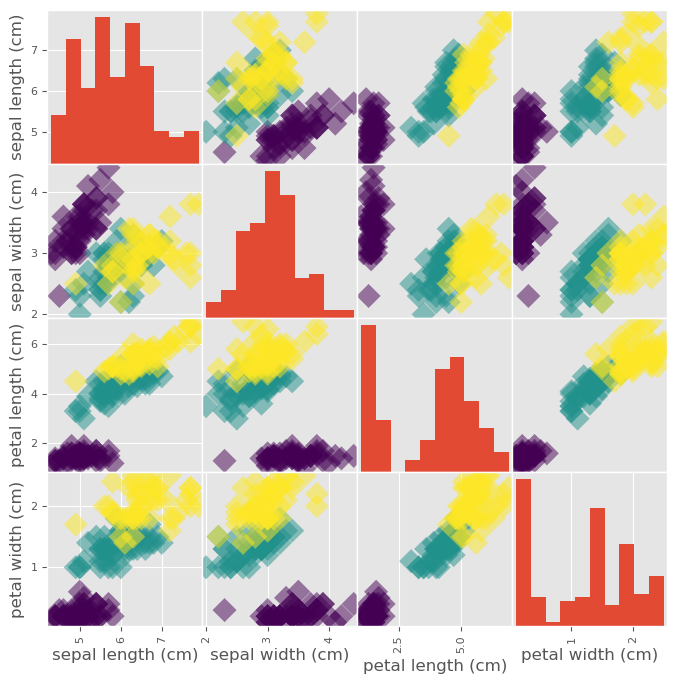

In [5]:
#Visual EDA
eda = pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s = 150, marker = 'D')

### k-Nearest Neighbors
1. What the KNN algorithm essentially does is **create a set of decision boundaries**.
2. All machine learning models in scikit-learn are implemented as python classes. These classes serve two purposes: <br>
(1) they **implement** the algorithms for learning a model, and predicting,  
(2) storing all the information that is learned from the data.   
3. Training a model on the data is also called **fitting the model to the data**. 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Predict the label data point by looking at the K=6, which means the nearest 6 data points
knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [7]:
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


In [8]:
# Predicting on unlabeled data
x_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(x_new)
print(x_new.shape)

(3, 4)


In [9]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


It predicts one, which corresponds to 'versicolor' for the first two observations and 0, which corresponds to 'setosa' for the third.

### Exercise

### k-Nearest Neighbors: Predict

In [10]:
# The original Dataset doesn't has the first row of headers, so I refer to JennyR's Repo
# https://github.com/JinnyR/Datacamp-Supervised-Learning-with-scikit-learn/blob/master/Classification.ipynb
# Datacamp's original Data: 
# df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv')

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/votes-ch1.csv')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Fit

In [11]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)
# print("Prediction: {}".format(y_pred))

# Predict and print the label for the new data point X_new
# don't know where is X_new
# new_prediction = knn.predict(X_new)
# print("Prediction: {}".format(new_prediction))
# Result: Prediction: ['democrat']

### Measuring model Performance

In [12]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify = y)
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Tests set predictions: {}".format(y_pred))
      
knn.score(X_test, y_test)

Tests set predictions: ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democ

0.9541984732824428

As K increases, the decision boundary gets smoother and less curvy. <br>
Therefore, we consider it to be a **less complex** model than those with a **lower K**. <br>Generally, complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data. This is know as overfitting.
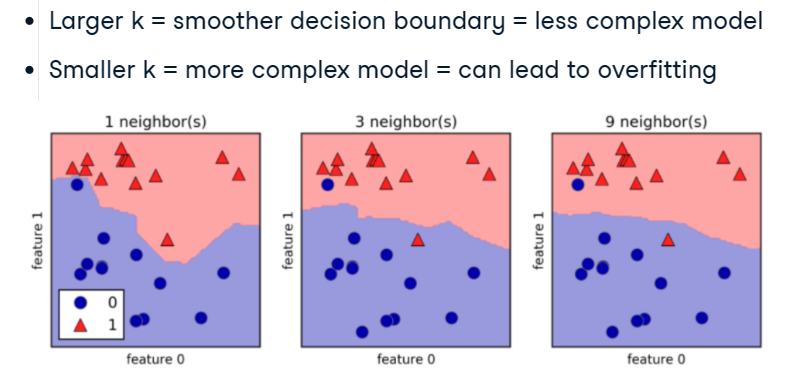

### The digits recognition dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

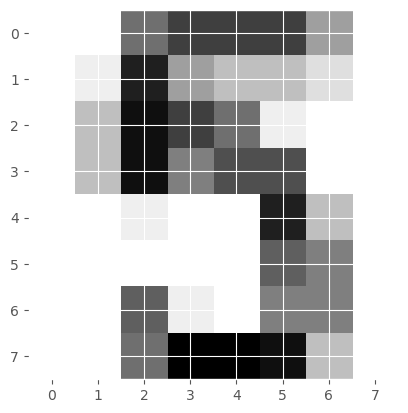

In [15]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [17]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Overfitting and underfitting

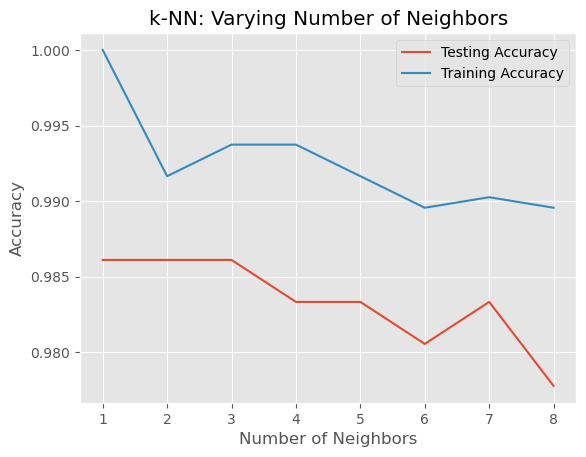

In [18]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()